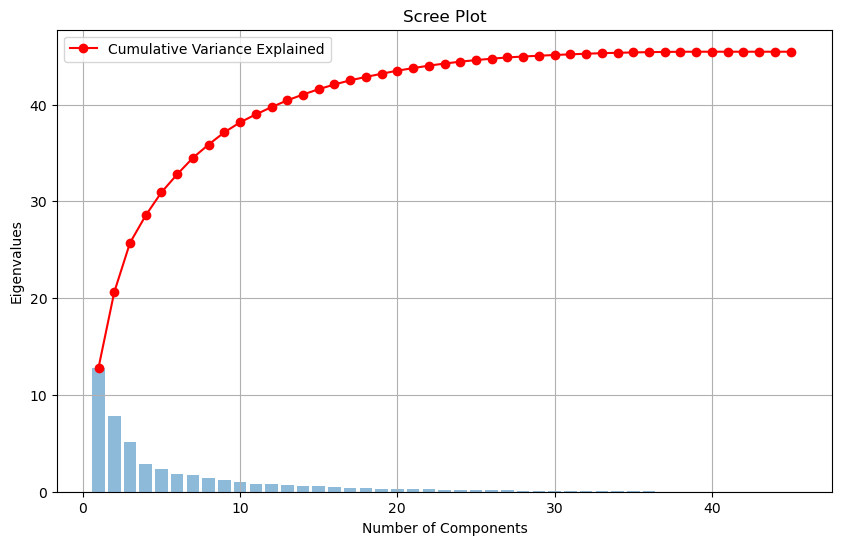

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load your weather-related data into a feature matrix (X)
# Ensure that X has rows as time periods (e.g., months) and columns as variables (rain, sun radiation, etc.)

# Replace the file path with your data file
weather_data = pd.read_excel('/Users/germankosenkov/Code projects/Indonesian S&D/Production/Clean/Data/Refined_weather_data/4.Resampling/Resampled.xlsx')

# Separate the features (rain and sun radiation) from the target variable (palm oil production)
# Assuming 'Production' is the target variable column name
X = weather_data[[
    'Tn(I)', 'Tx(I)', 'Tavg(I)', 'RH_avg(I)', 'RR(I)', 'ss(I)', 'ff_x(I)', 'ddd_x(I)', 'ff_avg(I)',
    'Tn(J)', 'Tx(J)', 'Tavg(J)', 'RH_avg(J)', 'RR(J)', 'ss(J)', 'ff_x(J)', 'ddd_x(J)', 'ff_avg(J)',
    'Tn(N)', 'Tx(N)', 'Tavg(N)', 'RH_avg(N)', 'RR(N)', 'ss(N)', 'ff_x(N)', 'ddd_x(N)', 'ff_avg(N)',
    'Tn(O)', 'Tx(O)', 'Tavg(O)', 'RH_avg(O)', 'RR(O)', 'ss(O)', 'ff_x(O)', 'ddd_x(O)', 'ff_avg(O)',
    'Tn(S)', 'Tx(S)', 'Tavg(S)', 'RH_avg(S)', 'RR(S)', 'ss(S)', 'ff_x(S)', 'ddd_x(S)', 'ff_avg(S)'
]]

y = weather_data['Production']

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Calculate the covariance matrix
covariance_matrix = np.cov(X_scaled.T)

# Step 3: Eigenvalue decomposition
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Sort eigenvalues in descending order
eigenvalues_sorted = np.sort(eigenvalues)[::-1]

# Create a scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues_sorted, alpha=0.5, align='center')
plt.plot(range(1, len(eigenvalues) + 1), np.cumsum(eigenvalues_sorted), marker='o', linestyle='-', color='red')
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot')
plt.grid(True)
plt.legend(['Cumulative Variance Explained'], loc='best')
plt.show()
